Importing all the modules

In [36]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from collections import Counter
%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
#import sys
#np.set_printoptions(threshold=sys.maxsize)

Having a quick lookie at correlations

In [3]:
dataset = pd.read_csv('raw_train.csv')
new_features = pd.DataFrame()
#corr = dataset.corr()

#f, ax = plt.subplots(figsize=(20, 15))
#sns.heatmap(corr, vmax=.8, fmt='.2f', square=True, annot=False)

Making SalePrice a bit more gaussian

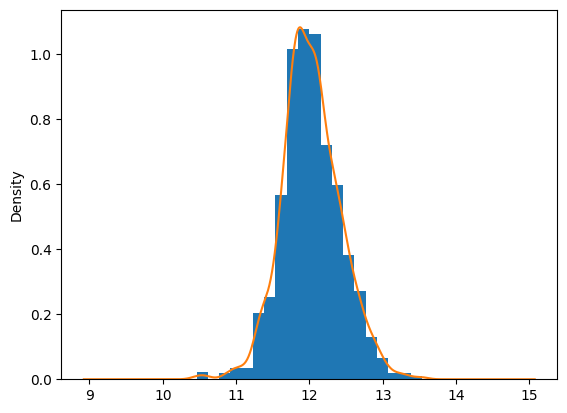

In [44]:
y = dataset['SalePrice']
y = np.log(y+1)
y.plot(kind="hist", density = True, bins = 20)
y.plot(kind="kde")
plt.show()
dataset["SalePrice"] = y

# Numerical Feature Analysis

In [4]:
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Having a look at all of their correlations with SalePrice

## Numerical Feature Correlations

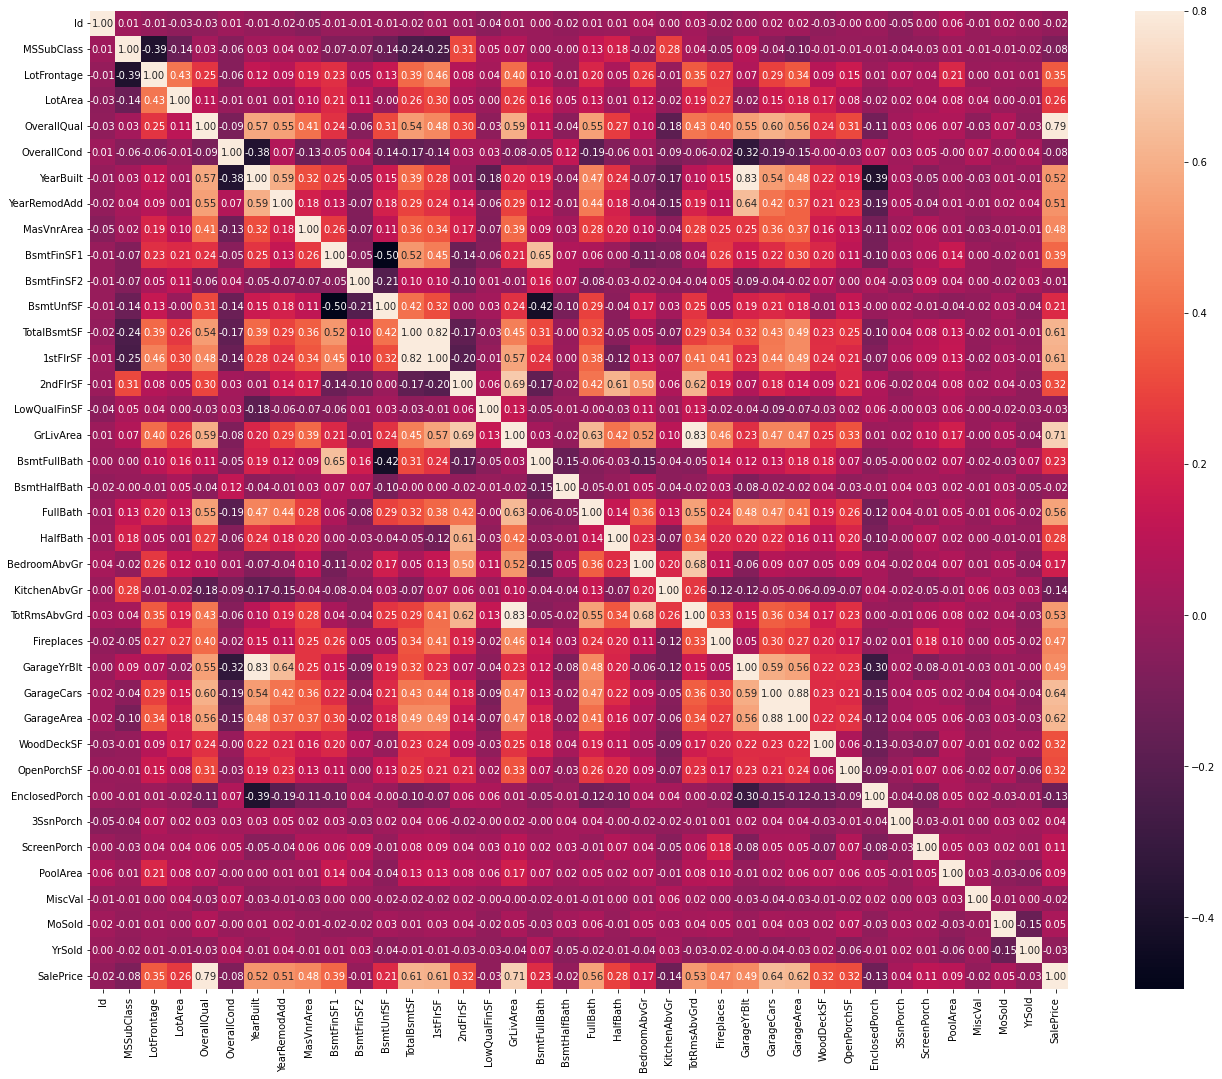

In [5]:
corr = numeric_features.corr()

f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corr, vmax=.8, fmt='.2f', square=True, annot=True)


#print(corr['SalePrice'].sort_values(ascending=False))
corr_keep = corr[np.abs(corr['SalePrice']) > 0.25]
#numeric_features = numeric_features[corr_keep['SalePrice'].index]
numeric_features_cleaned = numeric_features

Setting up features to drop, and the names of new ones to add. This gives us a history of our decision making, so we can implement a data cleaning function easily.

In [6]:
features_to_drop = []
features_to_add = []

## Numerical Features Distributions

In [6]:
"""
matplotlib.rc_file_defaults()
n_numerical = numeric_features.shape[1]
width = 3
height = np.int(np.ceil(n_numerical/width))
numeric_features_columns = numeric_features.columns
fig, ax = plt.subplots(height, width, figsize = (15,45))
for i in range(0,height):
    for j in range(0,width):
        iteration = j + width*i
        if iteration >= n_numerical:
            break
        x = numeric_features[numeric_features_columns[iteration]]
        x.plot(kind="hist", density = True, bins = 25, ax=ax[i,j])
        x.plot(kind="kde", ax=ax[i,j])
        ax[i,j].set_title(numeric_features_columns[iteration])
plt.show()
"""

'\nmatplotlib.rc_file_defaults()\nn_numerical = numeric_features.shape[1]\nwidth = 3\nheight = np.int(np.ceil(n_numerical/width))\nnumeric_features_columns = numeric_features.columns\nfig, ax = plt.subplots(height, width, figsize = (15,45))\nfor i in range(0,height):\n    for j in range(0,width):\n        iteration = j + width*i\n        if iteration >= n_numerical:\n            break\n        x = numeric_features[numeric_features_columns[iteration]]\n        x.plot(kind="hist", density = True, bins = 25, ax=ax[i,j])\n        x.plot(kind="kde", ax=ax[i,j])\n        ax[i,j].set_title(numeric_features_columns[iteration])\nplt.show()\n'

Porch, Pool, Bathroom, Basement, MiscVal etc all look a bit odd - high density spiked about zero. Might want to combine similar features together (ie all porches) or distill down into a binary feature (ie has pool)
    
MoSold, Garage Area, TotRmsAbvGrnd, GrLivArea etc all look like relatively nice gaussians - could be useful!

Having a look at how feature vs SalePrice trends for each feature

In [7]:
"""
width = 3
height = np.int(np.ceil(n_numerical/width))
fig, ax = plt.subplots(height, width, figsize = (15,45))
for i in range(0,height):
    for j in range(0,width):
        iteration = j + width*i
        if iteration >= n_numerical:
            break
        x = numeric_features[[numeric_features_columns[iteration], "SalePrice"]]
        x.plot(numeric_features_columns[iteration], "SalePrice", kind="scatter", ax=ax[i,j])
        ax[i,j].set_xlabel(numeric_features_columns[iteration])
plt.show()
"""

'\nwidth = 3\nheight = np.int(np.ceil(n_numerical/width))\nfig, ax = plt.subplots(height, width, figsize = (15,45))\nfor i in range(0,height):\n    for j in range(0,width):\n        iteration = j + width*i\n        if iteration >= n_numerical:\n            break\n        x = numeric_features[[numeric_features_columns[iteration], "SalePrice"]]\n        x.plot(numeric_features_columns[iteration], "SalePrice", kind="scatter", ax=ax[i,j])\n        ax[i,j].set_xlabel(numeric_features_columns[iteration])\nplt.show()\n'

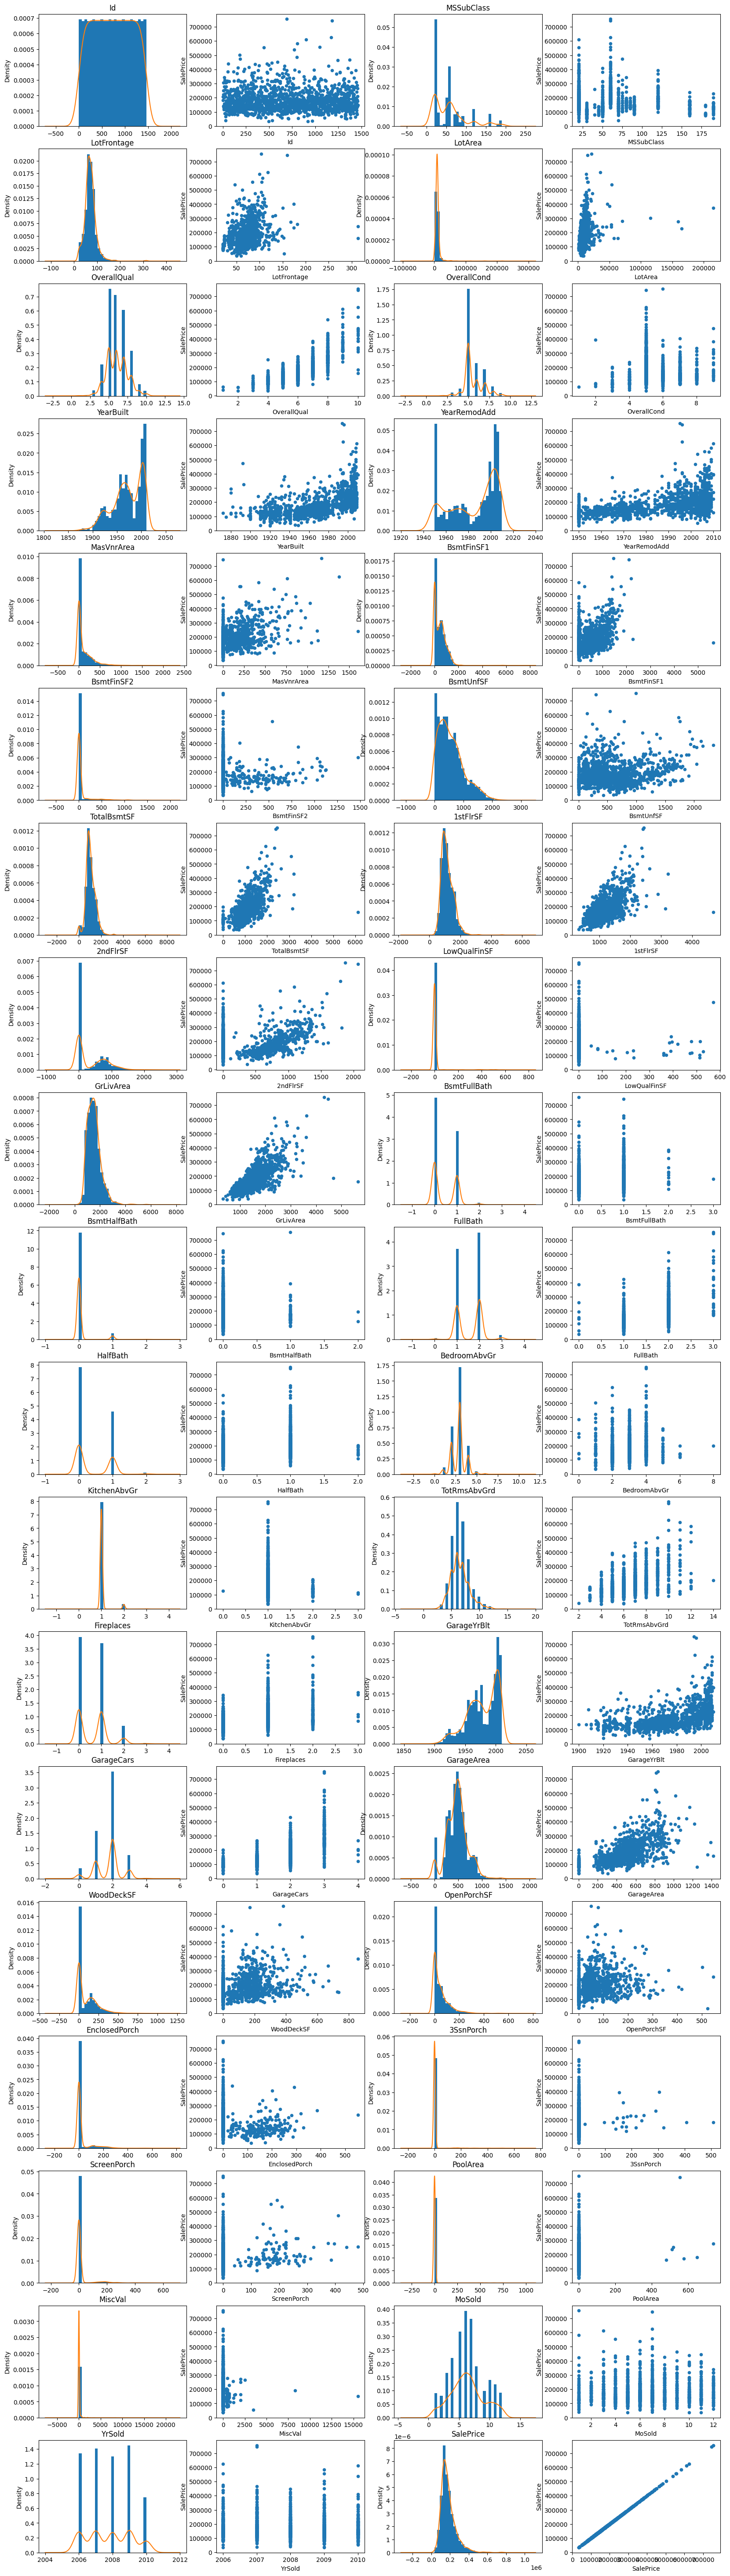

In [7]:
matplotlib.rc_file_defaults()
n_numerical = numeric_features.shape[1]
width = 2
height = np.int(np.ceil(n_numerical/width))
numeric_features_columns = numeric_features.columns
fig, ax = plt.subplots(height, width*2, figsize = (20,75))
for i in range(0,height):
    for j in range(0,width):
        iteration = j + width*i
        if iteration >= n_numerical:
            break    
        if j == 0:
            k = 0
        else:
            k = 2
        x = numeric_features[numeric_features_columns[iteration]]
        
        x.plot(kind="hist", density = True, bins = 25, ax=ax[i,k])
        x.plot(kind="kde", ax=ax[i,k])
        ax[i,k].set_title(numeric_features_columns[iteration])
        
        x = numeric_features[[numeric_features_columns[iteration], "SalePrice"]]
        x.plot(numeric_features_columns[iteration], "SalePrice", kind="scatter", ax=ax[i,k+1])
        
plt.show()

Some Flags:

"YrSold", "MoSold" both look like they might have a similar mean/median value and might not be useful - explore this further

"MSSubClass" looks very off - may be misclassified as a numeric feature - move to categoricals

Features like the bathroom ones look to be almost redundant on their own without any clear trends - maybe combine and see how they perform?

Basement finish features look like they have relatively weak correlations & few n > 0 data, may be better described by just "TotalBsmtSF"

Zero-heavy features such as porch and pool may require reworking as binary features - does additional pool area really add significantly more value on top of just having a pool?

There are also several outliers which may disrupt clear trends such as in LotArea & Frontage - deal with them?

In [8]:
features_to_drop = []
features_to_add = []

# Living Area Feature Analysis

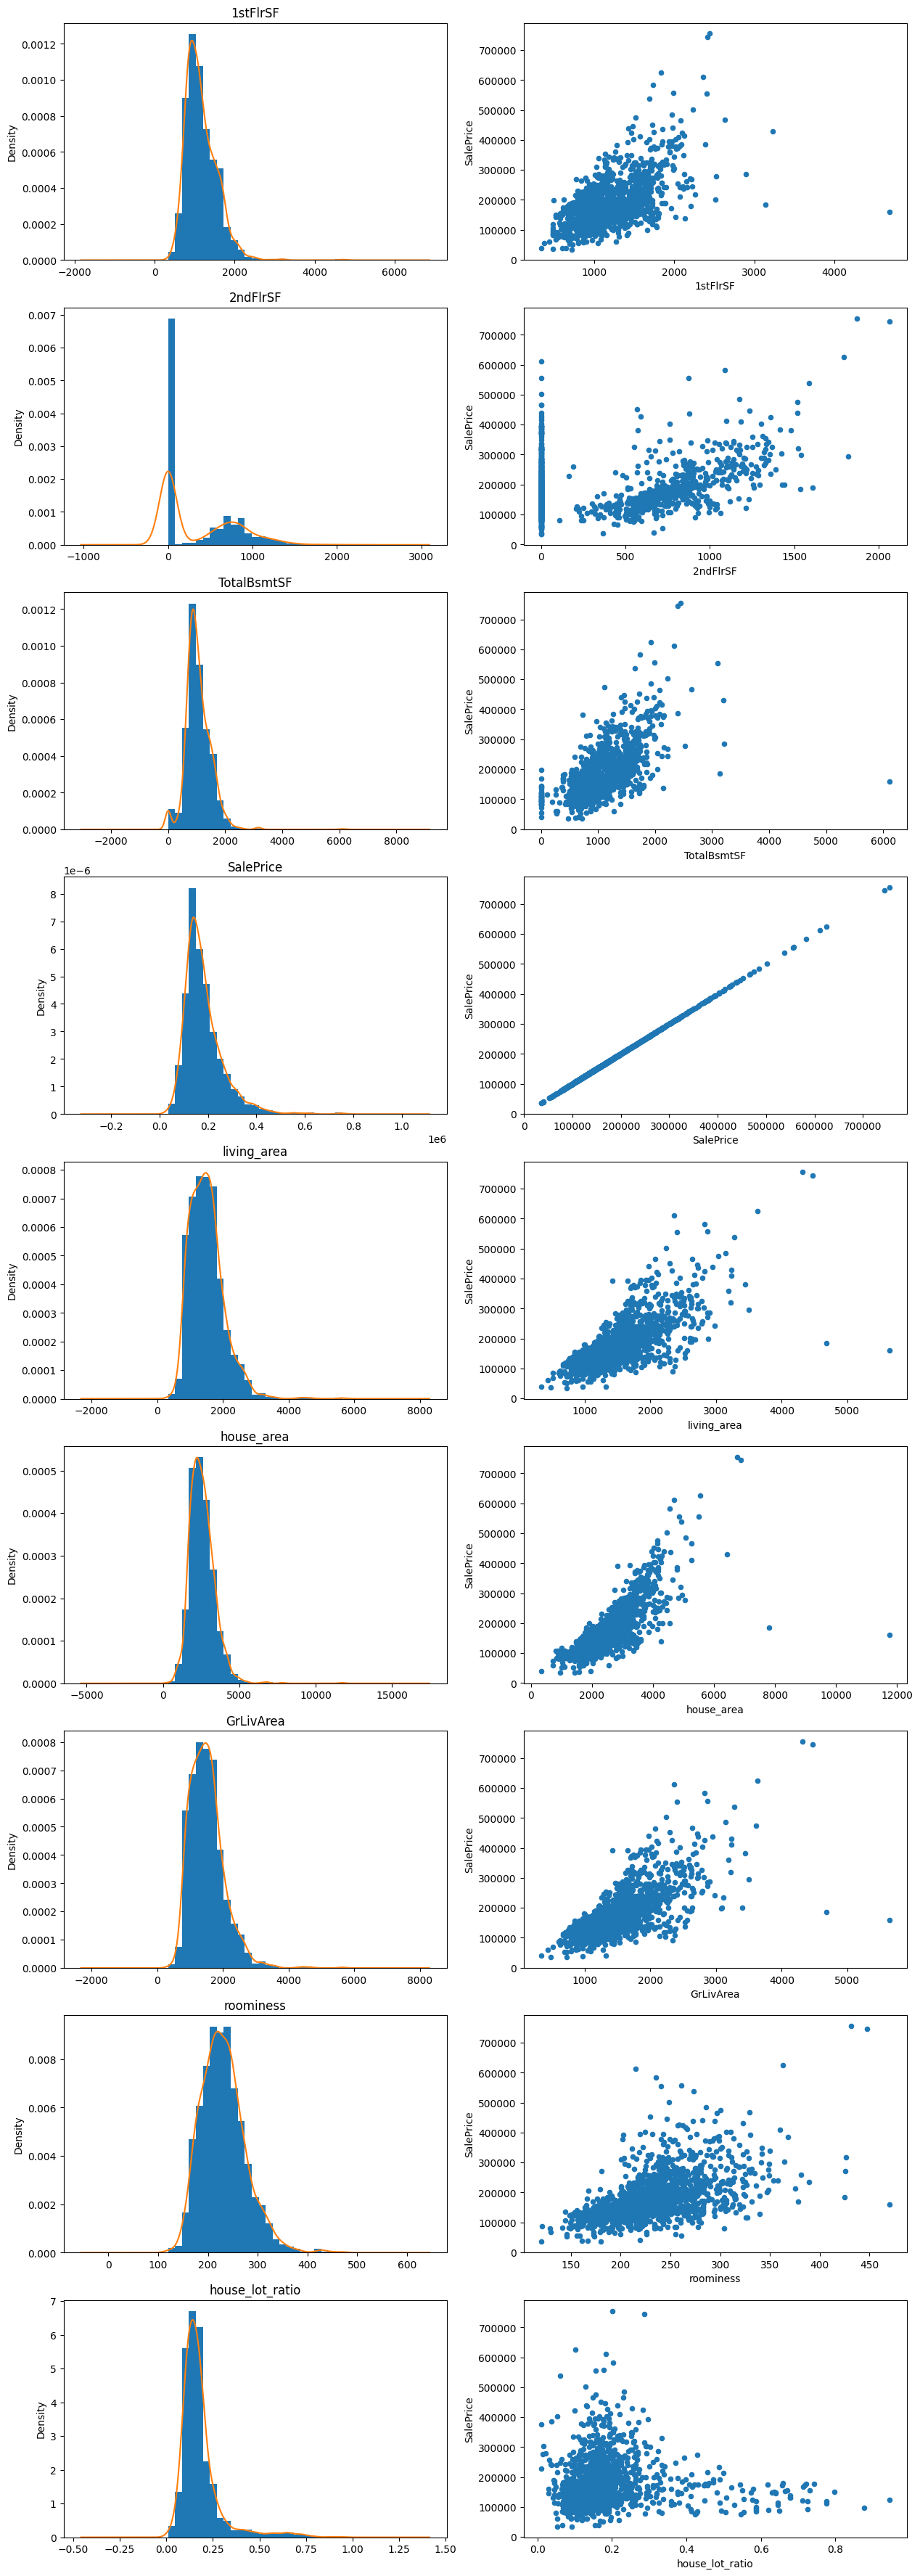

<AxesSubplot:>

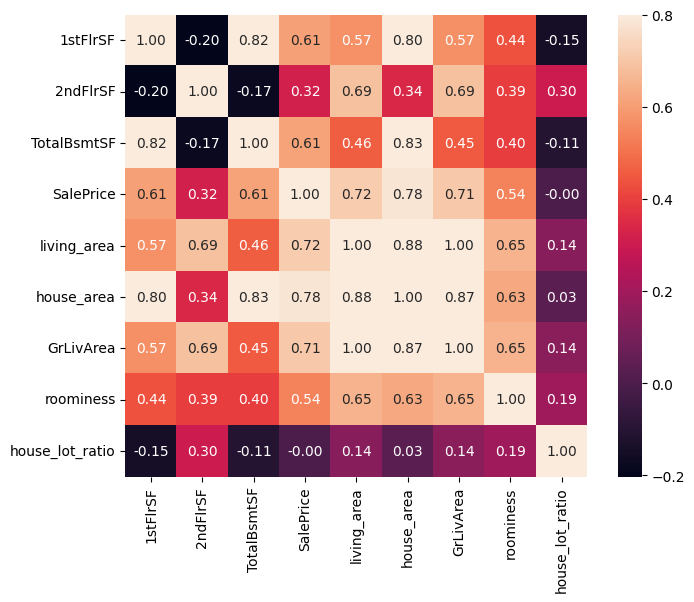

In [9]:
living_area = dataset["1stFlrSF"] + dataset["2ndFlrSF"]
house_area = living_area + dataset["TotalBsmtSF"]
roominess = dataset["GrLivArea"]/dataset["TotRmsAbvGrd"]
house_lot_ratio = dataset["GrLivArea"]/dataset["LotArea"]

corr_test = pd.DataFrame()
corr_test["1stFlrSF"] = dataset["1stFlrSF"]
corr_test["2ndFlrSF"] = dataset["2ndFlrSF"]
corr_test["TotalBsmtSF"] = dataset["TotalBsmtSF"]
corr_test["SalePrice"] = dataset["SalePrice"]
corr_test["living_area"] = living_area
corr_test["house_area"] = house_area
corr_test["GrLivArea"] = dataset["GrLivArea"]
corr_test["roominess"] = roominess
corr_test["house_lot_ratio"] = house_lot_ratio

test_columns = corr_test.columns
n_test = len(test_columns)

fig, ax = plt.subplots(n_test, 2, figsize = (15,45))
for i in range(n_test):
    header = test_columns[i]
    
    corr_test[header].plot(kind="hist", density = True, bins = 25, ax=ax[i,0])
    corr_test[header].plot(kind="kde", ax=ax[i,0])
    
    corr_test.plot(header, "SalePrice", kind="scatter", ax=ax[i,1])
    
    #test_columns.groupby(header)['SalePrice'].mean().plot(kind="line", color="b", ax=ax[i,2])
    #test_columns.groupby(header)['SalePrice'].median().plot(kind="bar", color="r", ax=ax[i,2])
    ax[i,0].set_title(header)
plt.show()

corr = corr_test.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmax=.8, fmt='.2f', square=True, annot=True)

Looks like 1stFlrSF, TotalBsmtSF, and house_area are all highly correlated. 

GrLivArea and living_area are the same feature, comprised of 1st and 2nd floor areas.

house_lot_area looks like a rubbish feature.

roominess is a decent feature.

Looks like a good step forward would be to keep TotalBsmtSF, GrLivArea, roominess, and 1stFlrSF. 2ndFlrSF isn't well correlated with SalePrice and not much is lost by dropping it. House_area is too similar to GrLivArea, and almost contains too much information.

In [10]:
#dataset_engineered = dataset_engineered.drop(columns = ["2ndFlrSF"])
#dataset_engineered["roominess"] = roominess

NameError: name 'dataset_engineered' is not defined

# Year Built/Renovated Feature Analysis

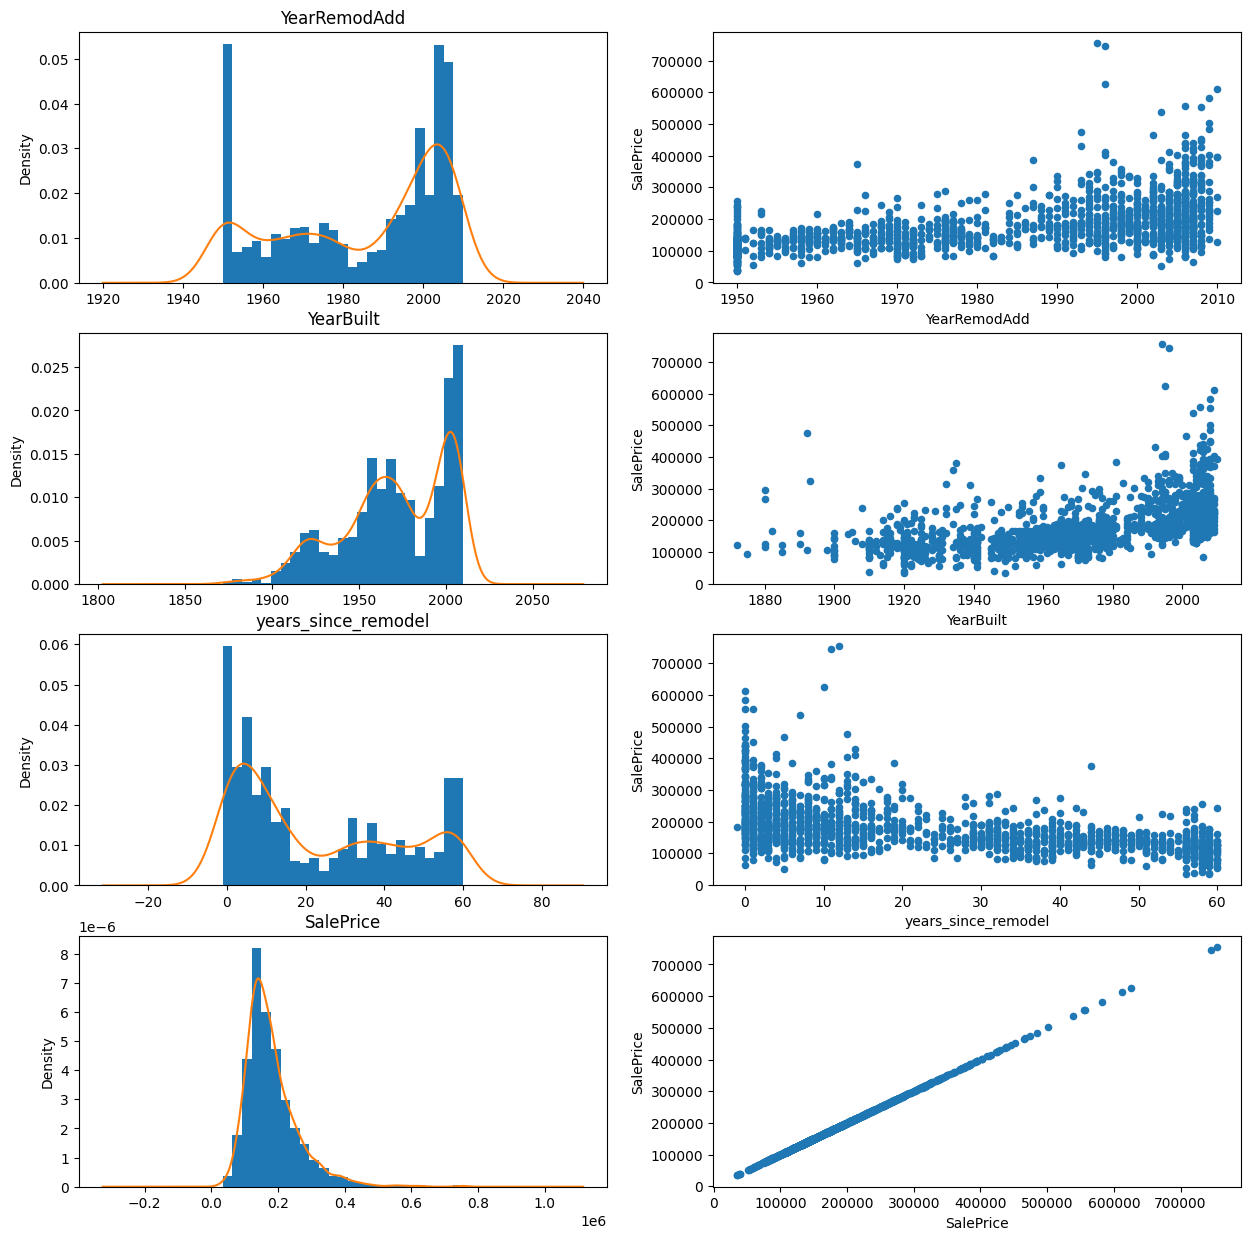

<AxesSubplot:>

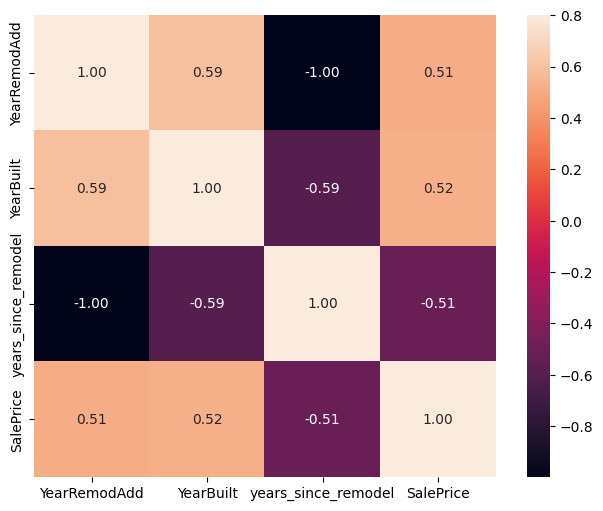

In [11]:
years_since_remodel = dataset["YrSold"] - dataset["YearRemodAdd"]

corr_test = pd.DataFrame()
corr_test["YearRemodAdd"] = dataset["YearRemodAdd"]
corr_test["YearBuilt"] = dataset["YearBuilt"]
corr_test["years_since_remodel"] = years_since_remodel
corr_test["SalePrice"] = dataset["SalePrice"]

test_columns = corr_test.columns
n_test = len(test_columns)

fig, ax = plt.subplots(n_test, 2, figsize = (15,15))
for i in range(n_test):
    header = test_columns[i]
    
    corr_test[header].plot(kind="hist", density = True, bins = 25, ax=ax[i,0])
    corr_test[header].plot(kind="kde", ax=ax[i,0])
    
    corr_test.plot(header, "SalePrice", kind="scatter", ax=ax[i,1])
    
    #test_columns.groupby(header)['SalePrice'].mean().plot(kind="line", color="b", ax=ax[i,2])
    #test_columns.groupby(header)['SalePrice'].median().plot(kind="bar", color="r", ax=ax[i,2])
    ax[i,0].set_title(header)
plt.show()

corr = corr_test.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmax=.8, fmt='.2f', square=True, annot=True)

# Pseudo Categorical Features

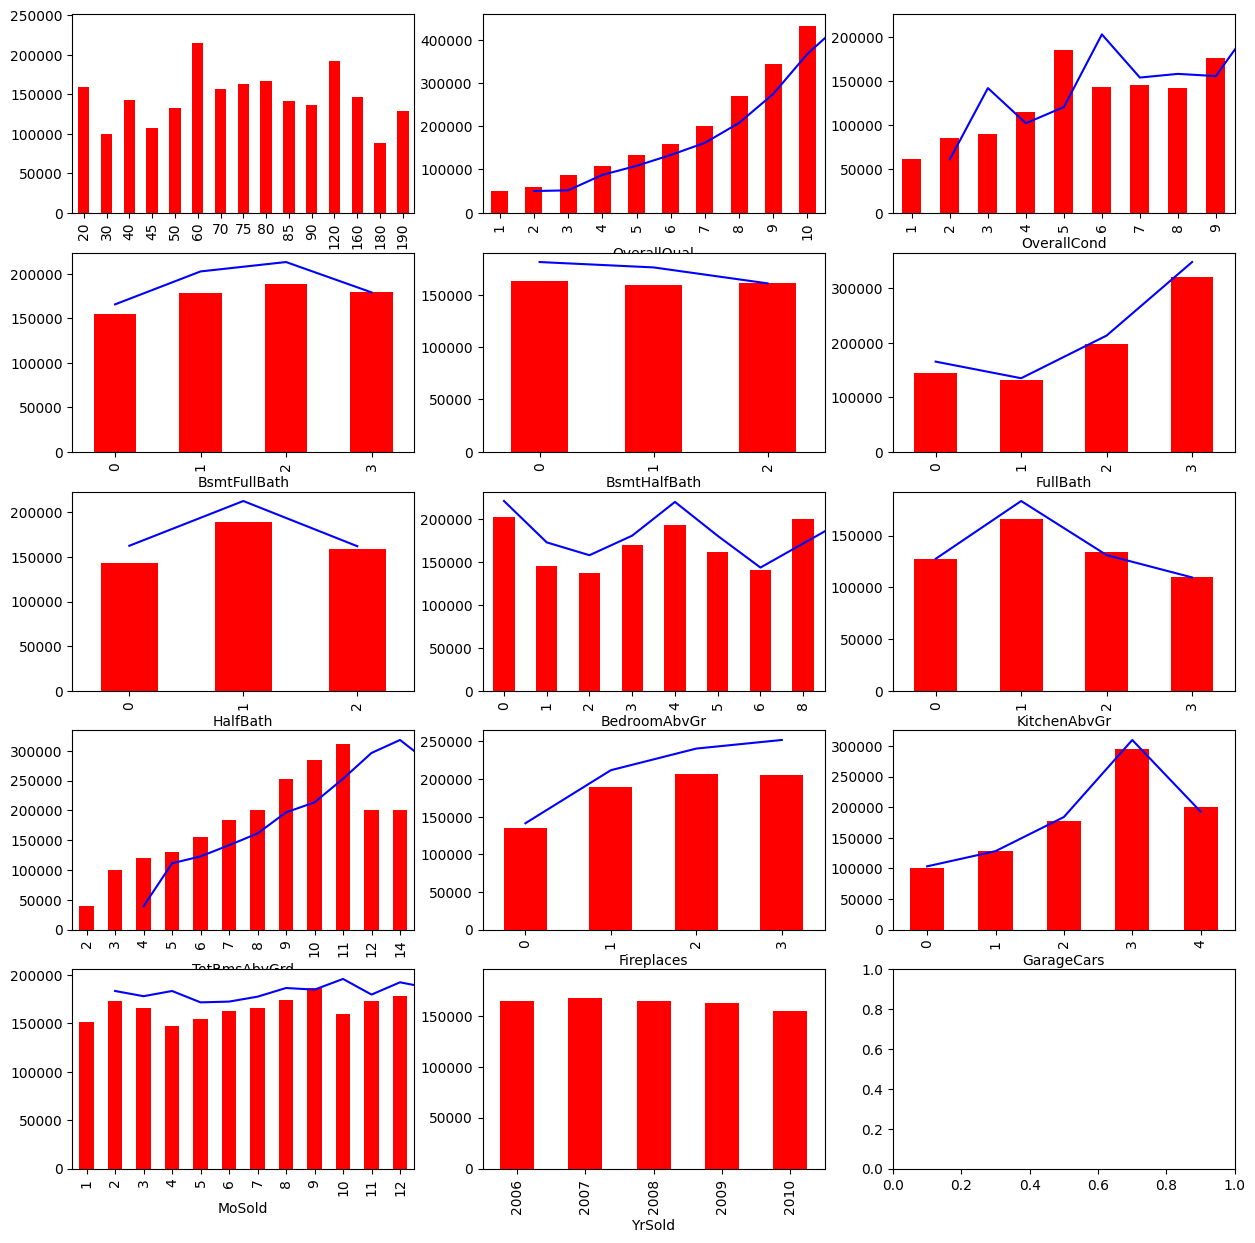

In [12]:
psuedo_categorical_headers = ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "YrSold"]
n_psuedo_categorical = len(psuedo_categorical_headers)
width = 3
height = np.int(np.ceil(n_psuedo_categorical/width))

fig, ax = plt.subplots(height, width, figsize = (15,15))
for i in range(0,height):
    for j in range(0,width):
        iteration = j + width*i
        if iteration >= n_psuedo_categorical:
            break
        x = numeric_features[[psuedo_categorical_headers[iteration], "SalePrice"]]
        
        x.groupby(psuedo_categorical_headers[iteration])['SalePrice'].mean().plot(kind="line", ax=ax[i,j], color="b")
        x.groupby(psuedo_categorical_headers[iteration])['SalePrice'].median().plot(kind="bar", ax=ax[i,j], color="r")
        
        ax[i,j].set_xlabel(psuedo_categorical_headers[iteration])
plt.show()

"MSSubClass" clearly is a categorical feature, and should be considered further.

The generalised "OverallQual" and "OverallCond" appear to represent the sale price reasonably well

The bathroom features "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath" hold some relevence, especailly "FullBath" - may want to consider all together

## Bath Analysis

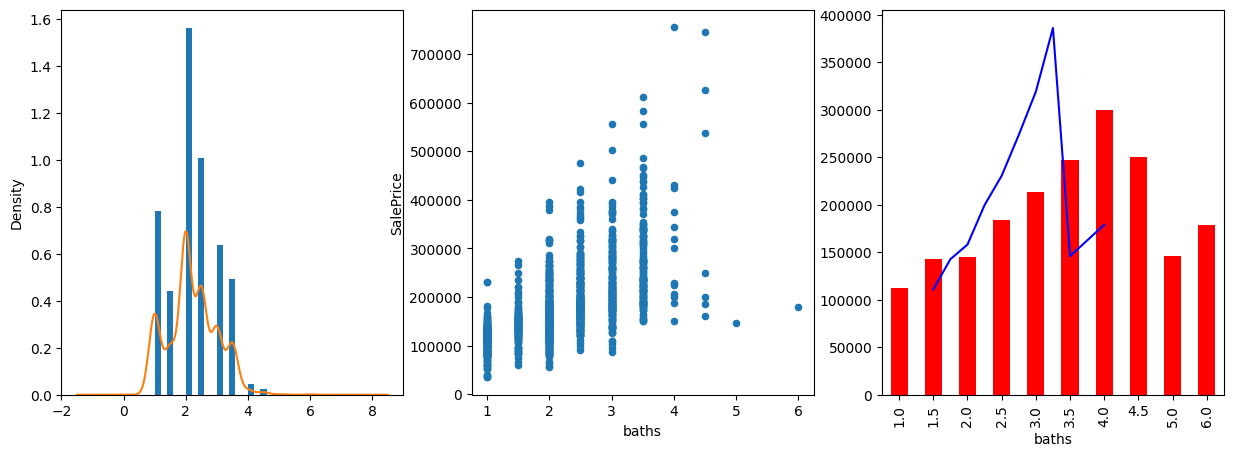

<AxesSubplot:>

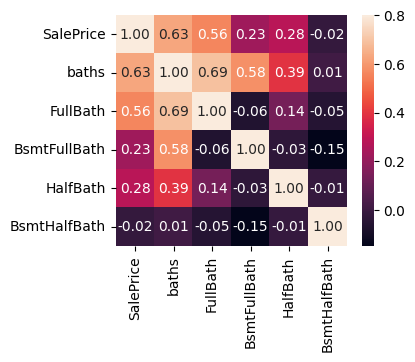

In [13]:
baths = dataset["FullBath"] + dataset["BsmtFullBath"] + 0.5*(dataset["HalfBath"] + dataset["BsmtHalfBath"])
x = pd.DataFrame()
x["SalePrice"] = dataset["SalePrice"]
x["baths"] = baths

fig, ax = plt.subplots(1, 3, figsize = (15,5))

baths.plot(kind="hist", density = True, bins = 25, ax=ax[0])
baths.plot(kind="kde", ax=ax[0])

x.plot("baths", "SalePrice", kind="scatter", ax=ax[1])

x.groupby("baths")['SalePrice'].mean().plot(kind="line", color="b", ax=ax[2])
x.groupby("baths")['SalePrice'].median().plot(kind="bar", color="r", ax=ax[2])

plt.show()

corr_test = pd.DataFrame()
corr_test["SalePrice"] = dataset["SalePrice"]
corr_test["baths"] = baths
corr_test["FullBath"] = dataset["FullBath"]
corr_test["BsmtFullBath"] = dataset["BsmtFullBath"]
corr_test["HalfBath"] = dataset["HalfBath"]
corr_test["BsmtHalfBath"] = dataset["BsmtHalfBath"]

corr = corr_test.corr()
f, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(corr, vmax=.8, fmt='.2f', square=True, annot=True)

This looks pretty good as a new feature! There is a gaussian(ish) distribution, and a reasonably linear trend between 1-4 baths, which is where almost all the data lies. There are very few data with baths > 4, so the trend drop is not too troubling! The correlation heatmap shows that this has improved the trend with SalePrice.

"BedroomAbvGr" and "KitchenAbvGr" vary almost insignificantly compared to "TotRmsAbvGrd" which appears to have a linear trend (ignoring the high-room outliers of 12 & 14)

Features such as "MoSold", "YrSold" do not carry any trend and have a similar mean/median accross the board, and hence should be dumped.

In [24]:
dataset_engineered = dataset_engineered.drop(columns = ["FullBath", "BsmtFullBath", "HalfBath", "BsmtHalfBath"])
dataset_engineered["Baths"] = baths

dataset_engineered = dataset_engineered.drop(columns = ["BedroomAbvGr", "KitchenAbvGr"])
dataset_engineered = dataset_engineered.drop(columns = ["MoSold", "YrSold"])

"FirePlaces" has a low sample size for n > 1, and the median price for n > 0 - it may benefit more as a binary feature

# Pseudo Binary Features

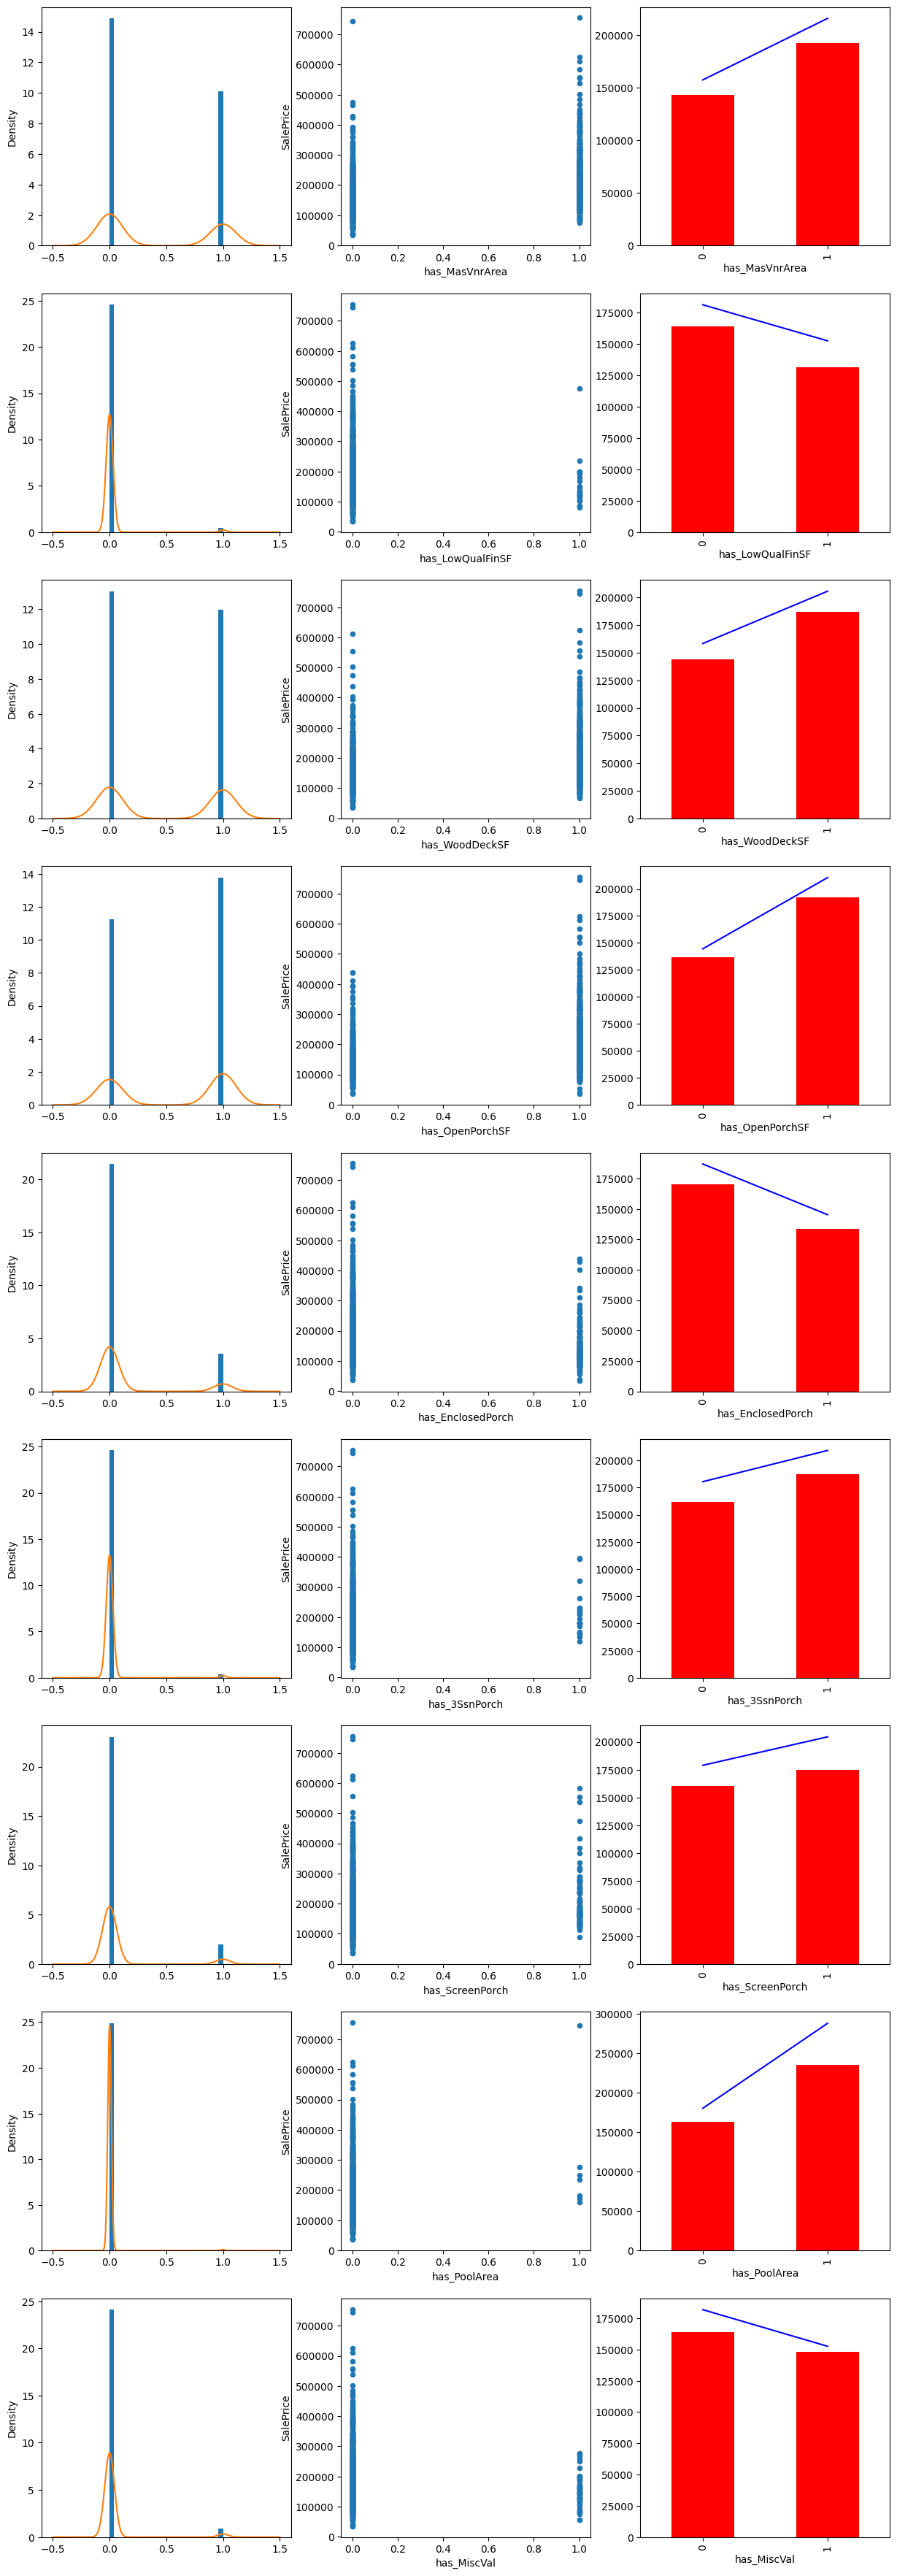

In [14]:
pseudo_binary_headers = ["MasVnrArea", "LowQualFinSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
n_pseudo_binary = len(pseudo_binary_headers)
pseudo_binary_features = pd.DataFrame()
for i in range(n_pseudo_binary):
    header = pseudo_binary_headers[i]
    pseudo_binary_features["has_"+header] = (dataset[header] > 0).astype(int)

pseudo_binary_features["SalePrice"] = dataset["SalePrice"]

fig, ax = plt.subplots(n_pseudo_binary, 3, figsize = (15,45))

for i in range(n_pseudo_binary):
    header = "has_"+pseudo_binary_headers[i]
    
    pseudo_binary_features[header].plot(kind="hist", density = True, bins = 25, ax=ax[i,0])
    pseudo_binary_features[header].plot(kind="kde", ax=ax[i,0])
    
    pseudo_binary_features.plot(header, "SalePrice", kind="scatter", ax=ax[i,1])
    
    pseudo_binary_features.groupby(header)['SalePrice'].mean().plot(kind="line", color="b", ax=ax[i,2])
    pseudo_binary_features.groupby(header)['SalePrice'].median().plot(kind="bar", color="r", ax=ax[i,2])
plt.show()

"MasVnrArea" looks like a great feature to keep, with a ~ 50/50 split between 0, 1; and a reasonable difference in mean/median price.

"OpenPorch" and "WoodDecking" behave similarly (makes sense - both function similarly as open outside areas) and could be bundled into one feature?

"EnclosedPorch" appears to act opposite to the outside porch/deck mentioned above.

"ScreenPorch" and "3SsnPorch" also act similarly - may be combined.

"PoolArea" has a notable jump for 1, however the sample size is tiny. Might be worth keeping anyhow, or else pool feature may be completely lost.

"MiscVal" has a less significant fall and again a small sample size. 

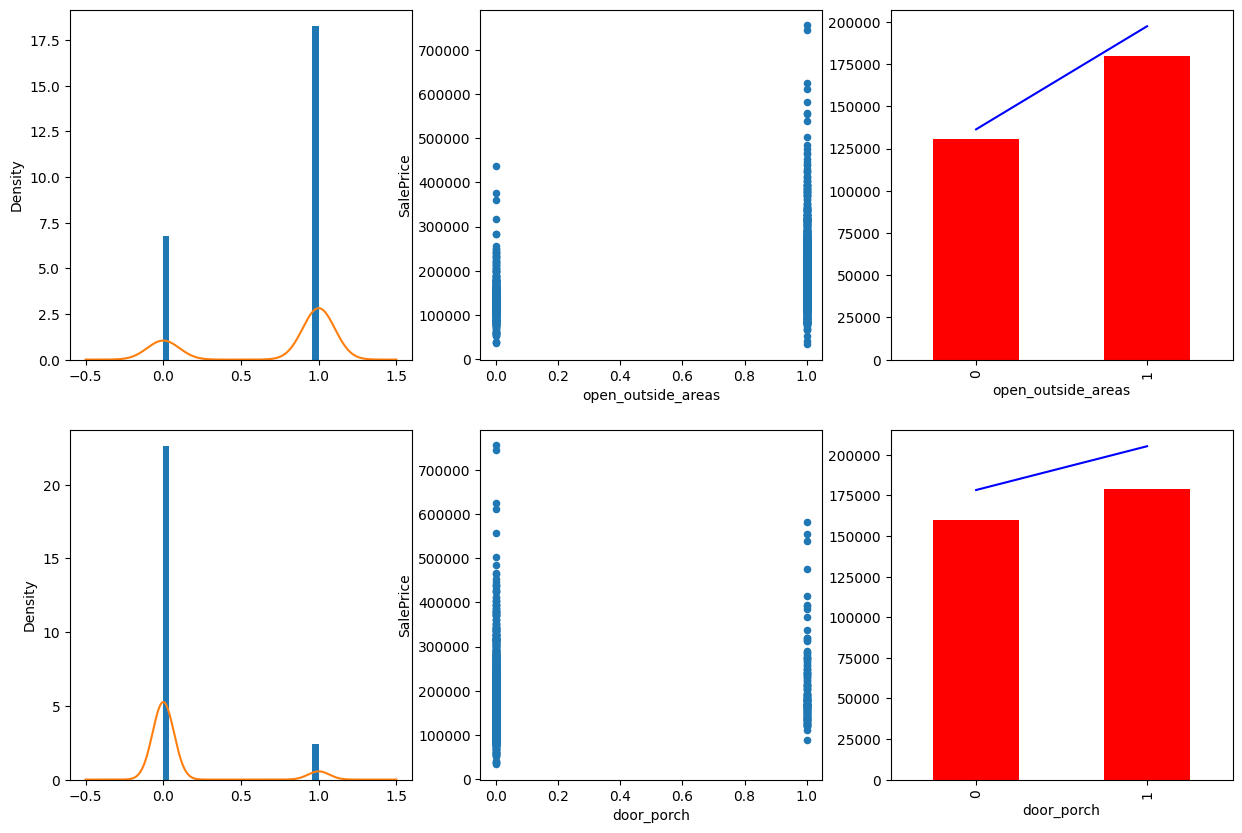

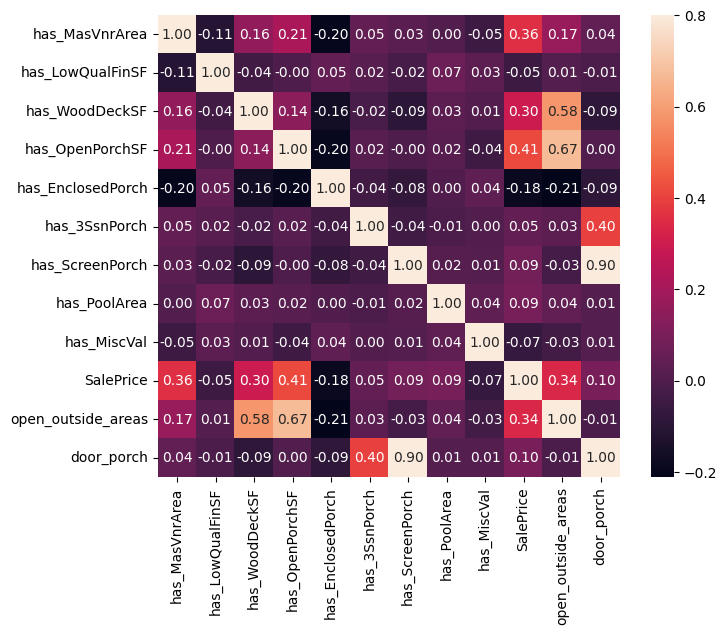

In [15]:
pseudo_binary_features["open_outside_areas"] = (dataset["WoodDeckSF"]+dataset["OpenPorchSF"] > 0).astype(int)
pseudo_binary_features["door_porch"] = (dataset["ScreenPorch"]+dataset["3SsnPorch"] > 0).astype(int)

n=2
headers = ["open_outside_areas", "door_porch"]

fig, ax = plt.subplots(n, 3, figsize = (15,10))
for i in range(n):
    header = headers[i]
    
    pseudo_binary_features[header].plot(kind="hist", density = True, bins = 25, ax=ax[i,0])
    pseudo_binary_features[header].plot(kind="kde", ax=ax[i,0])
    
    pseudo_binary_features.plot(header, "SalePrice", kind="scatter", ax=ax[i,1])
    
    pseudo_binary_features.groupby(header)['SalePrice'].mean().plot(kind="line", color="b", ax=ax[i,2])
    pseudo_binary_features.groupby(header)['SalePrice'].median().plot(kind="bar", color="r", ax=ax[i,2])
plt.show()

corr = pseudo_binary_features.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmax=.8, fmt='.2f', square=True, annot=True)
plt.show()

open_outside_areas is a decent predictor and will be kept.

MasVnrArea has a better correlation (0.48) before being being biniarised (0.36) so should be kept as a numeric feature.

PoolArea isn't fantastic, but might be kept for the time being and re evaluated later.

In [16]:
dataset_engineered["Open_Outside_Areas"] = pseudo_binary_features["open_outside_areas"]
dataset_engineered["Has_Pool"] = pseudo_binary_features["has_PoolArea"]

dataset_engineered = dataset_engineered.drop(columns = ["LowQualFinSF", "EnclosedPorch", "3SsnPorch", "MiscVal", "WoodDeckSF", "OpenPorchSF"])

NameError: name 'dataset_engineered' is not defined

# Categorical Feature Analysis

In [17]:
categoricals = dataset.select_dtypes(exclude=[np.number])
categoricals = categoricals.fillna(0)
categoricals.describe()

MSZoning Street  Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460   1460     1460        1460      1460      1460   
unique        5      2      3        4           4         2         5   
top          RL   Pave      0      Reg         Lvl    AllPub    Inside   
freq       1151   1454   1369      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1460      1460   
unique         6        8          15          16          5         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1460     1460         1460         1460   
unique         5          6        5        5            5            7   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1460    1460      1460       1460       1460        1460   
unique            7       6         5          2          6           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional  FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         1460       1460         1460       1460       1460   
unique          7            6          7            4          6          6   
top           Typ            0     Attchd          Unf         TA         TA   
freq         1360          690        870          605       1311       1326   

       PavedDrive  PoolQC  Fence  MiscFeature SaleType SaleCondition  
count        1460    1460   1460         1460     1460          1460  
unique          3       4      5            5        9             6  
top             Y       0      0            0       WD        Normal  
freq         1340    1453   1179         1406     1267          1198

In [18]:
categoricals["MSSubClass"] = dataset["MSSubClass"]
categoricals["SalePrice"] = dataset["SalePrice"]

In [46]:
"""
n_categorical = categoricals.shape[1]
plot_square_length = int(np.ceil(np.sqrt(n_categorical)))
categoricals_columns = categoricals.columns
fig, ax = plt.subplots(15, 3, figsize = (15,50))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.7)

for i in range(0,15):
    for j in range(0,3):
        iteration = j + 3*i
        if iteration >= n_categorical:
            break
        if categoricals_columns[iteration] == "SalePrice":
            break
        categoricals.groupby(categoricals_columns[iteration])['SalePrice'].mean().plot(kind="line", ax=ax[i,j], color="b")
        categoricals.groupby(categoricals_columns[iteration])['SalePrice'].median().plot(kind="bar", ax=ax[i,j], color="r")
plt.show()
"""

'\nn_categorical = categoricals.shape[1]\nplot_square_length = int(np.ceil(np.sqrt(n_categorical)))\ncategoricals_columns = categoricals.columns\nfig, ax = plt.subplots(15, 3, figsize = (15,50))\nplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.7)\n\nfor i in range(0,15):\n    for j in range(0,3):\n        iteration = j + 3*i\n        if iteration >= n_categorical:\n            break\n        if categoricals_columns[iteration] == "SalePrice":\n            break\n        categoricals.groupby(categoricals_columns[iteration])[\'SalePrice\'].mean().plot(kind="line", ax=ax[i,j], color="b")\n        categoricals.groupby(categoricals_columns[iteration])[\'SalePrice\'].median().plot(kind="bar", ax=ax[i,j], color="r")\nplt.show()\n'

In [47]:
"""
n_categorical = categoricals.shape[1]
plot_square_length = int(np.ceil(np.sqrt(n_categorical)))
categoricals_columns = categoricals.columns
fig, ax = plt.subplots(15, 3, figsize = (20,70))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i in range(0,15):
    for j in range(0,3):
        iteration = j + 3*i
        if iteration >= n_categorical:
            break
        if categoricals_columns[iteration] == "SalePrice":
            break
        count = Counter(categoricals[categoricals_columns[iteration]])
        x = pd.Series(count)
        x.plot(kind='bar', ax=ax[i,j])
        ax[i,j].set_title(categoricals_columns[iteration])
plt.show()
"""

'\nn_categorical = categoricals.shape[1]\nplot_square_length = int(np.ceil(np.sqrt(n_categorical)))\ncategoricals_columns = categoricals.columns\nfig, ax = plt.subplots(15, 3, figsize = (20,70))\nplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)\n\nfor i in range(0,15):\n    for j in range(0,3):\n        iteration = j + 3*i\n        if iteration >= n_categorical:\n            break\n        if categoricals_columns[iteration] == "SalePrice":\n            break\n        count = Counter(categoricals[categoricals_columns[iteration]])\n        x = pd.Series(count)\n        x.plot(kind=\'bar\', ax=ax[i,j])\n        ax[i,j].set_title(categoricals_columns[iteration])\nplt.show()\n'

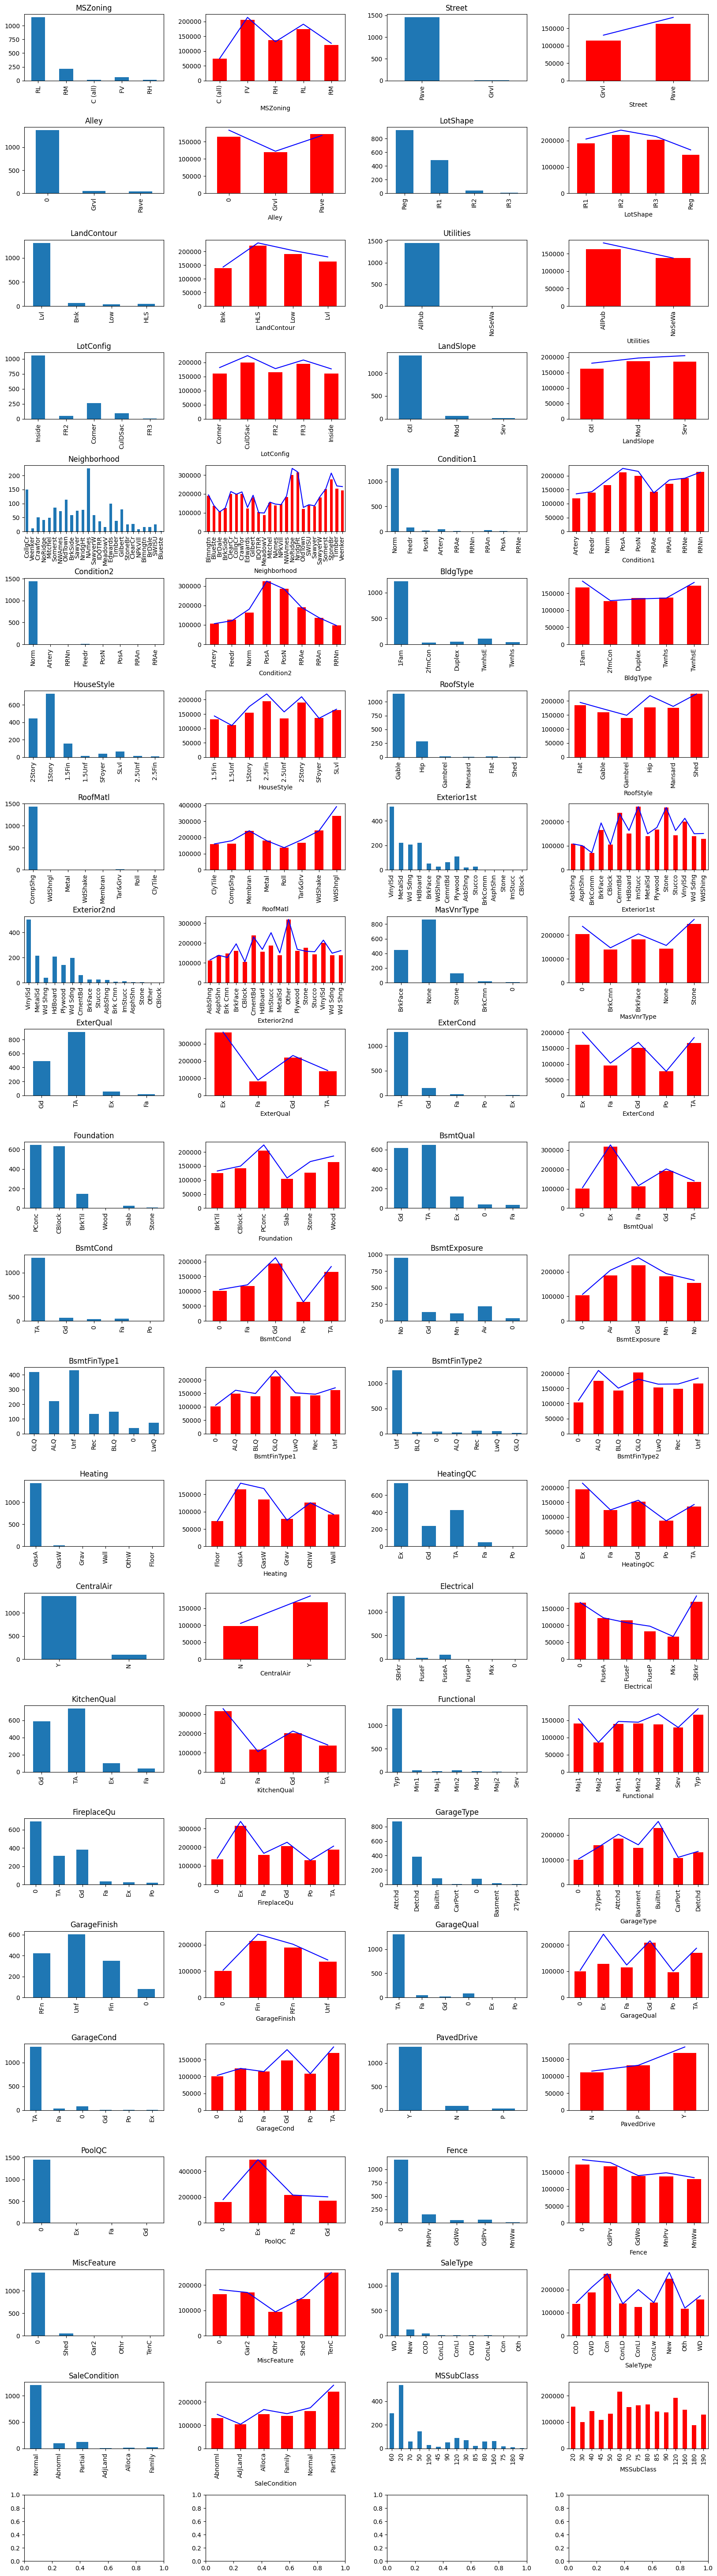

In [19]:
n_categorical = categoricals.shape[1]
width = 2
height = int(np.ceil(n_categorical/width))
categoricals_columns = categoricals.columns

fig, ax = plt.subplots(height, width*2, figsize = (20,75))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.7)

for i in range(0,height):
    for j in range(0,width):
        iteration = j + width*i
        if iteration >= n_categorical:
            break   
        if categoricals_columns[iteration] == "SalePrice":
            break
        if j == 0:
            k = 0
        else:
            k = 2
        
        count = Counter(categoricals[categoricals_columns[iteration]])
        x = pd.Series(count)
        x.plot(kind='bar', ax=ax[i,k])
        ax[i,k].set_title(categoricals_columns[iteration])
        
        categoricals.groupby(categoricals_columns[iteration])['SalePrice'].mean().plot(kind="line", ax=ax[i,k+1], color="b")
        categoricals.groupby(categoricals_columns[iteration])['SalePrice'].median().plot(kind="bar", ax=ax[i,k+1], color="r")

MSZoning - Residentials = 1, else (C) = 0

Street - Pave = 1, else (Gravel) = 0

Alley - Gravel = 1, else(Pave) = 0

LotShape - Regular = 1, else(Irreg) = 0

LandContour - TBC

Utilities - AllPub = 1, else = 0

LotConfig - FR3/CDSac = 1, else = 0

LandSlope - Gd = 1, else= = 0

Neighbourhood - top (NoRidge, NRidgHt, StoneBr) = 1; med (SawyerW, Somerst, Timber, Veenker, Gilbert, ClearCr, CollgCr, Crawfor, Blmngtn, NWAmes)

BldgType - spacious (1Fam, TwnhsE) = 1, else = 0

HouseStyle - 2storey (2.5Fin, 2Storey) = 1; 1 Storey & Slvl = 1

Roofstyle - TBC

RoofMatl - TBC

In [32]:
to_encode = categoricals.drop(columns = ["SalePrice"])
encoded = pd.get_dummies(to_encode.astype(str))
encoded["SalePrice"] = dataset["SalePrice"]

['MSZoning_RM', 'LotShape_Reg', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_0', 'FireplaceQu_Ex', 'FireplaceQu_Gd', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_Unf', 'GarageCond_TA', 'SaleType_New', 'SaleCondition_Partial', 'MSSubClass_60', 'SalePrice']


<AxesSubplot:>

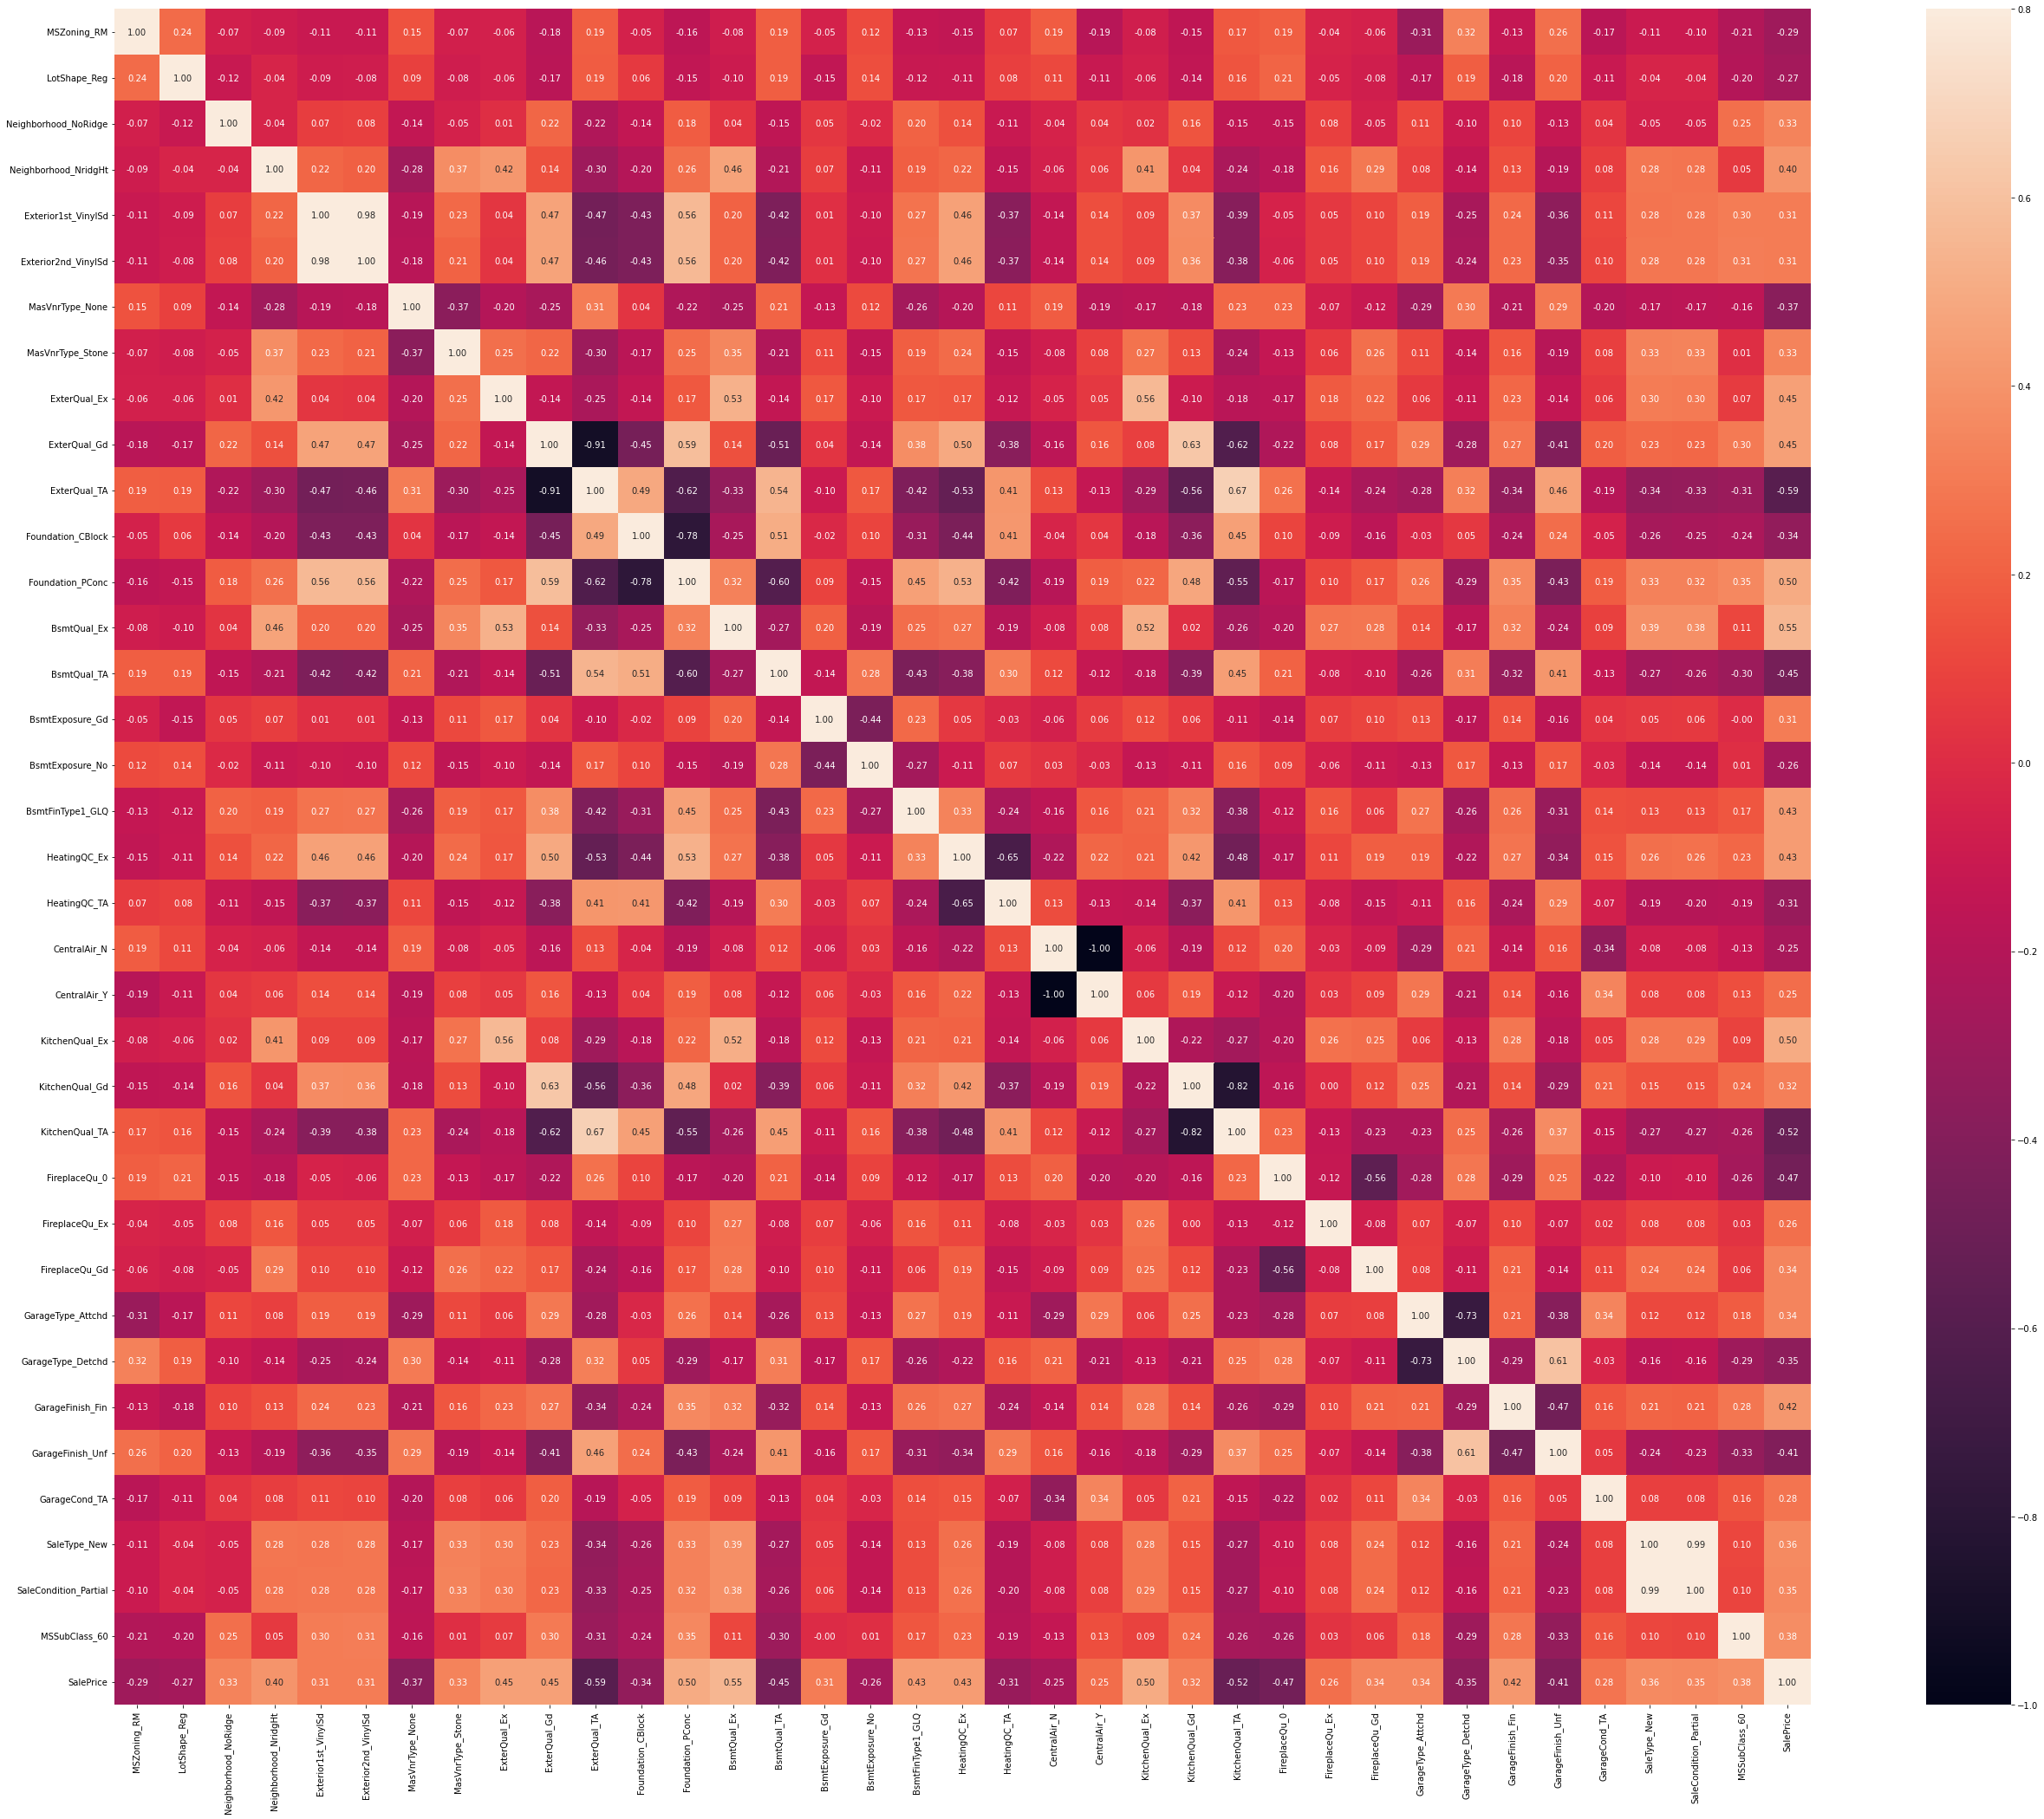

In [78]:
corr = encoded.corr()

correlations = corr["SalePrice"].sort_values(ascending=False).to_string()

corr_keep_headers = corr[np.abs(corr['SalePrice']) > 0.25].index.to_list()

print(corr_keep_headers)

corr_keep_dataset = pd.DataFrame()
corr_keep_dataset[corr_keep_headers] = encoded[corr_keep_headers]

corr_keep = corr_keep_dataset.corr()

f, ax = plt.subplots(figsize=(48, 36))
sns.heatmap(corr_keep, vmax=.8, fmt='.2f', square=True, annot=True)

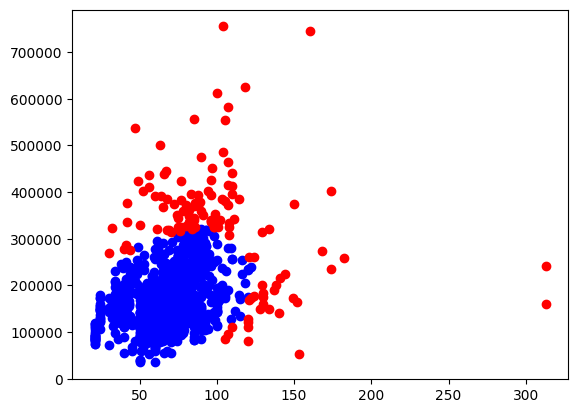

In [53]:
from sklearn.covariance import EllipticEnvelope
x = numeric_features[["SalePrice", "LotFrontage"]].dropna().to_numpy()


cov = EllipticEnvelope().fit(x)
inlier = cov.predict(x)==1; outlier = cov.predict(x)==-1

plt.scatter(x[inlier,1], x[inlier,0], c="b")
plt.scatter(x[outlier,1], x[outlier,0], c="r")